##  IMPORT DATASETS AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [2]:
df_train = pd.read_csv('training_set.csv') #Reading the csv file

In [3]:
df_train.head()   # Top 5 rows of the dataset

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [4]:
df_test = pd.read_csv('test_set.csv')

In [5]:
df_test.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


## EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [6]:
df_train.info()# Check the dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

In [7]:
df_train.describe() # Statistical summary of the dataframe

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,3909.000000,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


In [8]:
df_train.isnull().sum() # check if there are any Null values

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
X30           0
X31           0
X32           0
X33           0
X34           0
X35           0
X36           0
X37           0
X38           0
X39           0
X40           0
X41           0
X42           0
X43           0
X44           0
X45           0
X46           0
X47           0
X48           0
X49           0
X50           0
X51           0
X52           0
X53           0
X54           0
X55           0
X56           0
X57           0
Y             0
dtype: int64

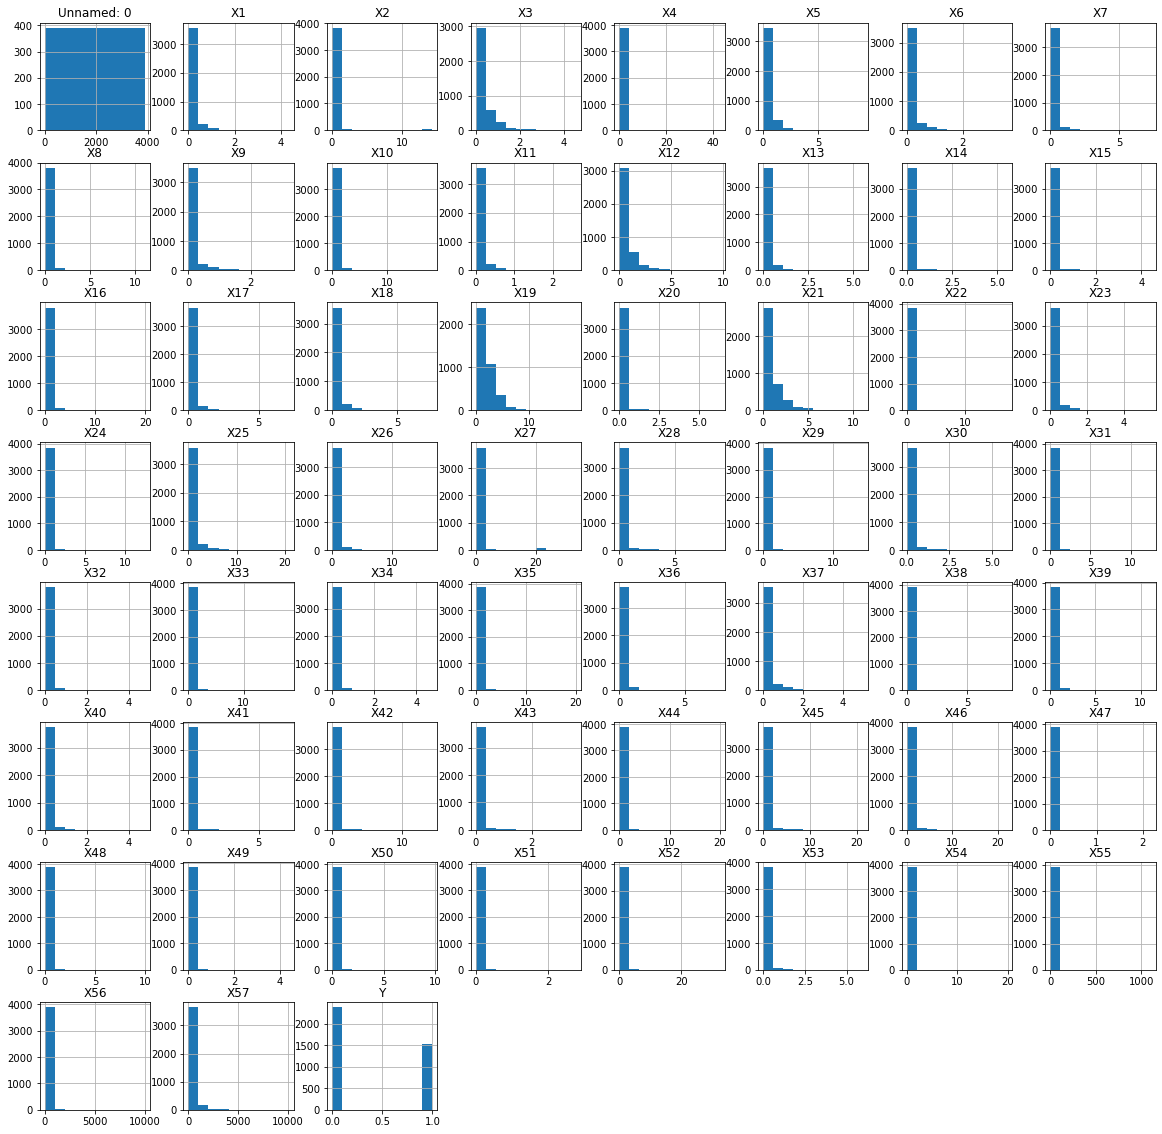

In [9]:
df_train.hist(bins=10,figsize=(20,20))
plt.show() # Plot the histogram

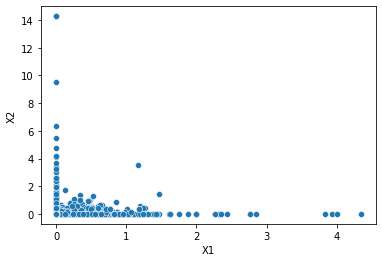

In [10]:
sns.scatterplot(data = df_train, x = 'X1', y = 'X2')
plt.show()

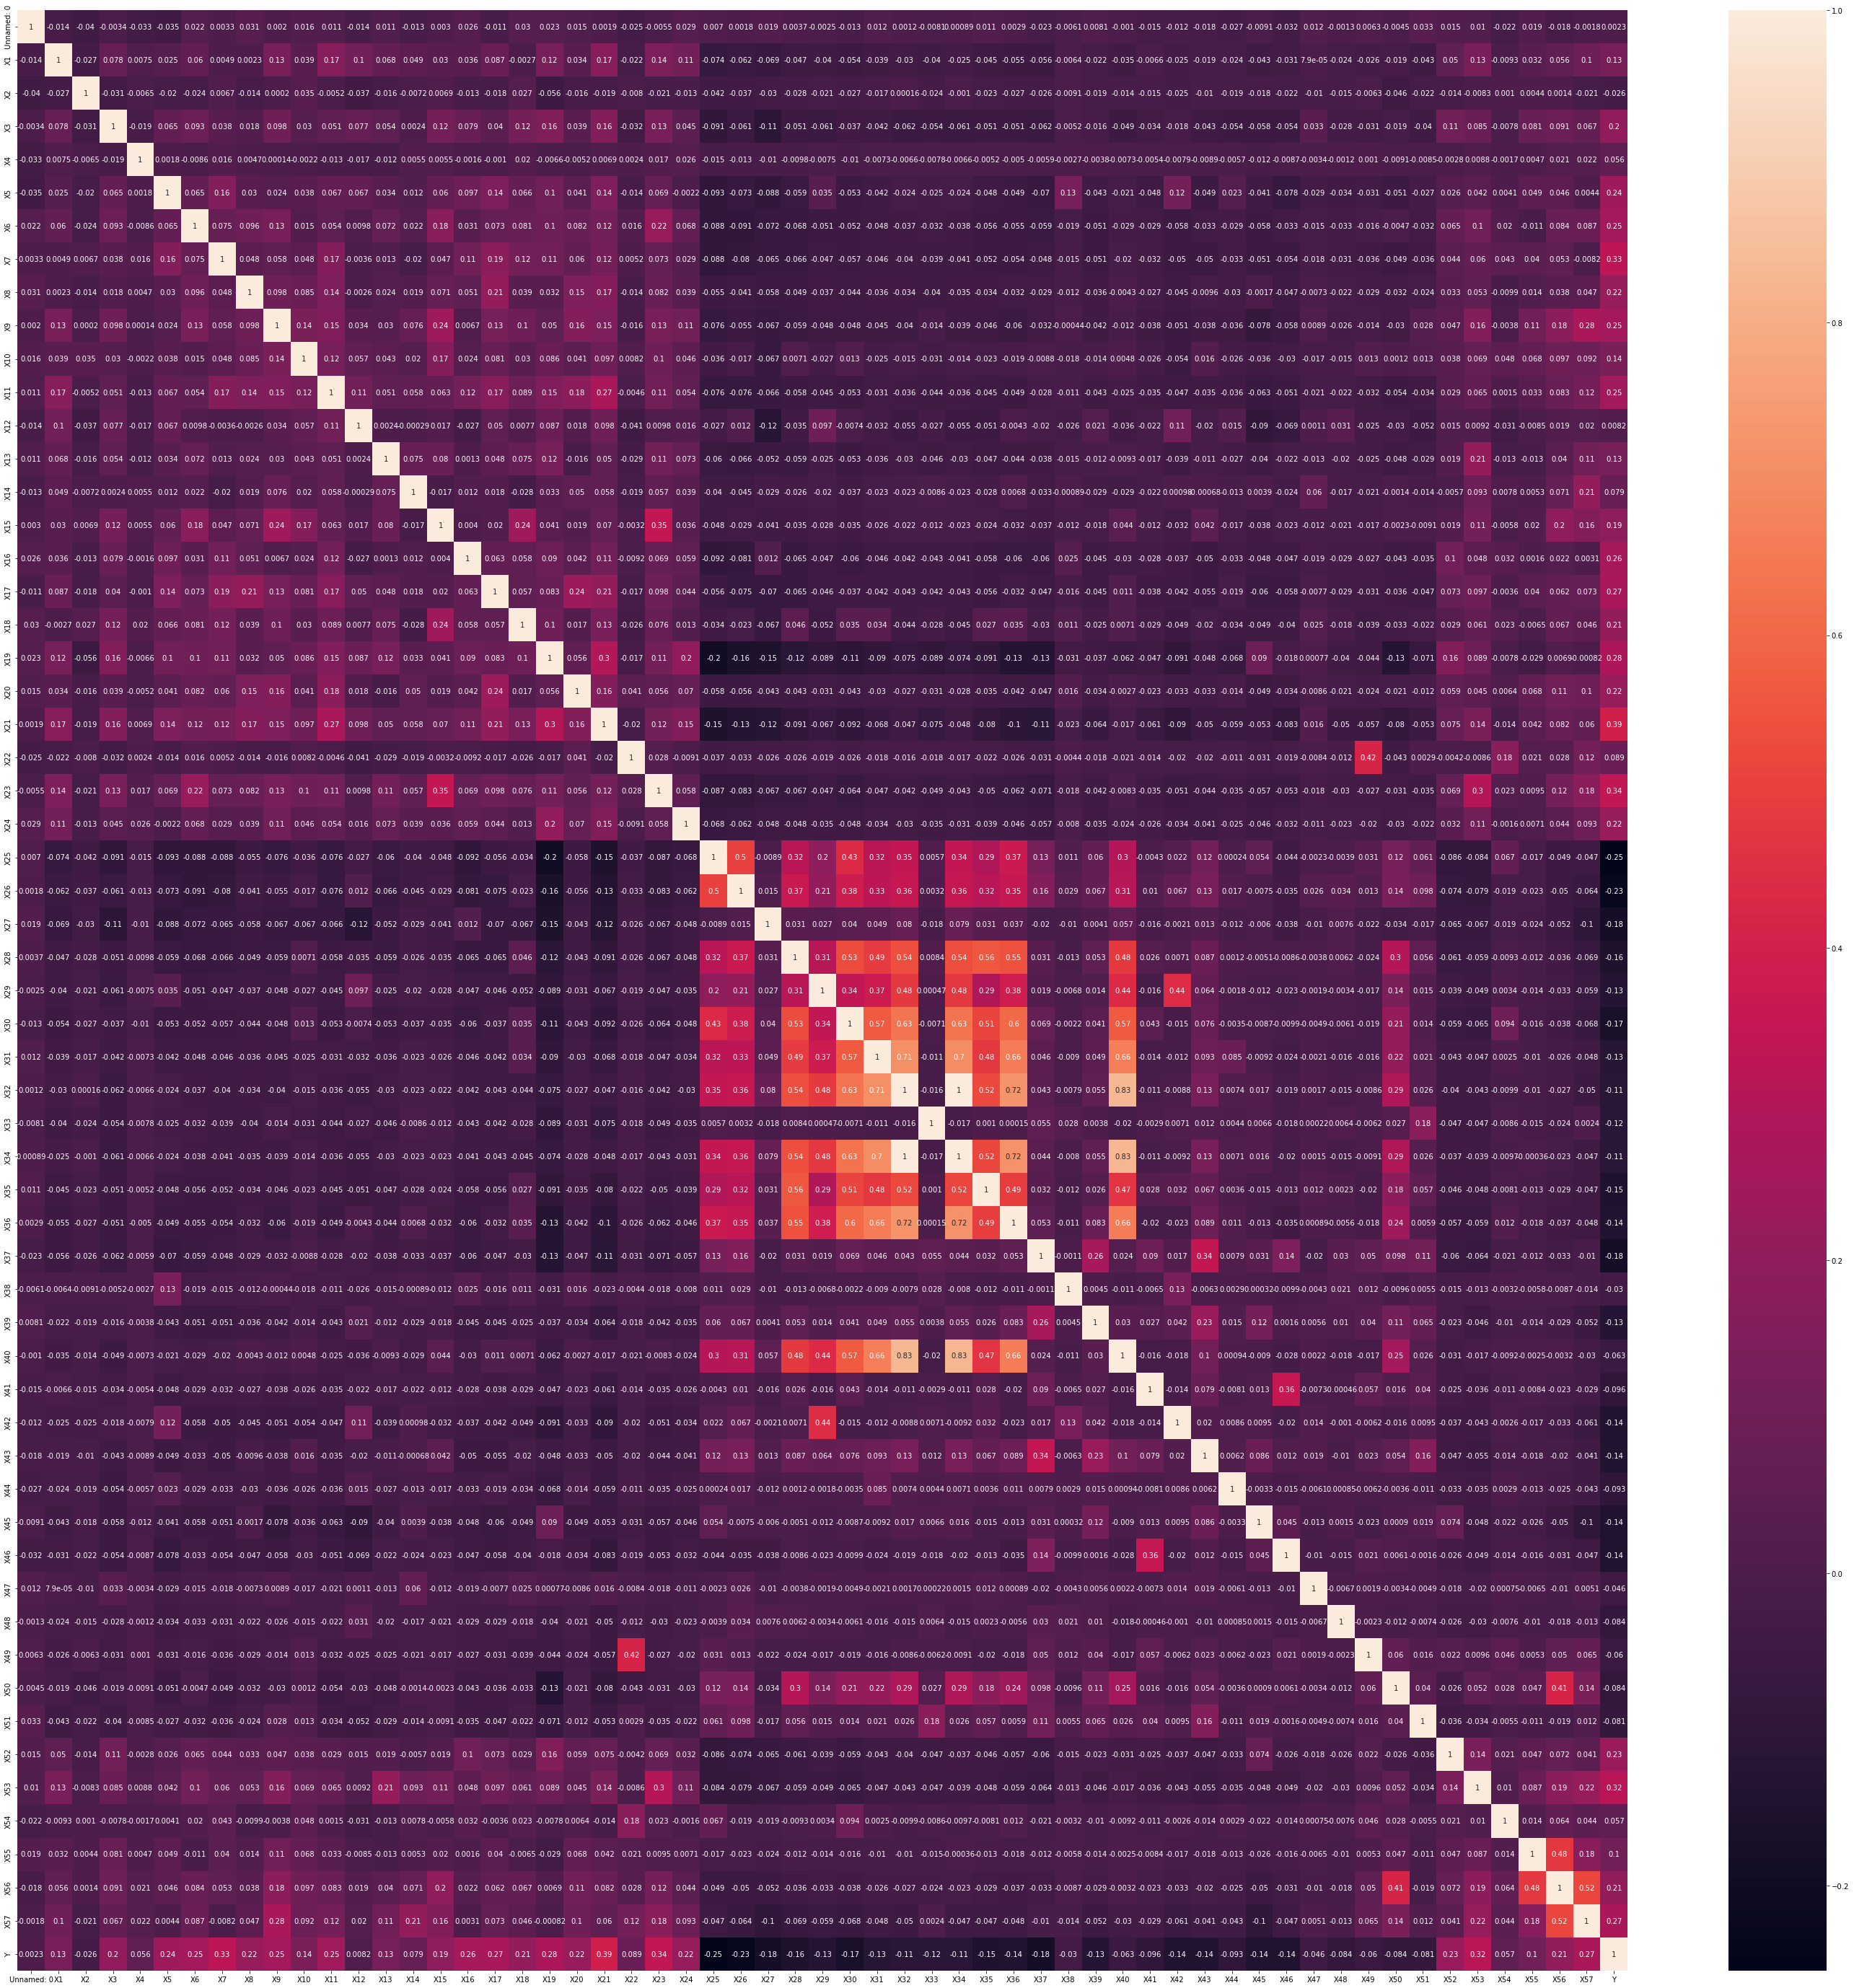

In [11]:
# Plot the correlation matrix
plt.figure(figsize = (50,50))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

### We will remove all the feature whose correlation value when compare with Y  less than 0.1

In [12]:
df_train = df_train.drop(["Unnamed: 0","X2","X12","X25","X26","X27","X28","X29","X30","X31","X32","X33","X34","X35","X36","X37","X38","X39","X40",
                         "X41","X42","X43","X44","X45","X46","X47","X48","X49","X50","X51","X4","X14","X22","X54"],axis=1)

In [13]:
df_train.shape

(3910, 25)

## CREATE TRAINING AND VALIDATION DATASET

In [14]:
X = df_train.drop("Y",axis=1)
Y = df_train["Y"]

In [15]:
X.shape,Y.shape

((3910, 24), (3910,))

In [16]:
X_train,X_val,y_train,y_val = train_test_split(X,Y,train_size=0.8) # dividing training and validation dataset in 4:1 

In [17]:
X_train.shape,X_val.shape

((3128, 24), (782, 24))

## TRAIN A RANDOM FOREST CLASSFIER MODEL IN SCIKIT-LEARN

In [18]:
dr=  RandomForestClassifier()

In [19]:
randforest_params = [{'max_depth': list(range(10, 15))}]
clf1 = GridSearchCV(dr, randforest_params, cv = 10, scoring='accuracy')

clf1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14]}],
             scoring='accuracy')

In [20]:
print(clf1.best_params_)

print(clf1.best_score_)

{'max_depth': 14}
0.9350987138527074


In [21]:
pre_val1 = clf1.predict(X_val)

In [22]:
print("Accuracy Score",accuracy_score(y_val,pre_val1))

Accuracy Score 0.9398976982097187


In [23]:
print("F1 Score",f1_score(y_val,pre_val1))

F1 Score 0.9121495327102804


In [24]:
conf = confusion_matrix(y_val,pre_val1)

In [25]:
print("Confusion Matrix:",conf)

Confusion Matrix: [[491  15]
 [ 32 244]]


### PREDICT THE TEST DAT